<a href="https://colab.research.google.com/github/sahana360/Machine-Learning/blob/master/KNN_MNSIT_Digit_Recognition_System_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading CSV files

In [4]:
import pandas as pd                    #importing modules
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dfx=pd.read_csv('/content/xdata.csv')           #reading csv files
dfy=pd.read_csv('/content/ydata.csv')

In [7]:
x=dfx.values                           #reading values from csv files
y=dfy.values


x=x[:,1:]
y=y[:,1:].reshape(-1,)

# print(x)                              
# print(y)
print(x.shape)
print(y.shape)


(399, 2)
(399,)


#Making Classification using KNN algorithm

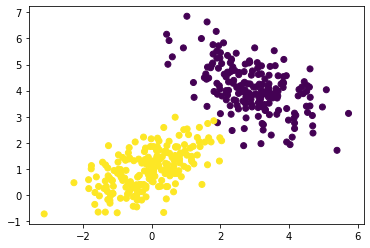

In [8]:
plt.scatter(x[:,0],x[:,1],c=y)              #plotting a graph of x and  y data
plt.show()

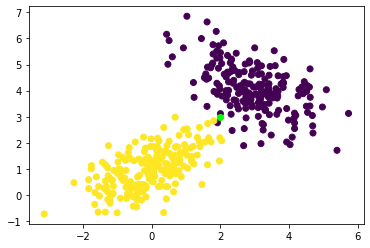

In [11]:
query_x=np.array([2,3])                              #querying a point into array to apply knn and make prediction
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(query_x[0],query_x[1],color="lime")
plt.show()

In [12]:
def dist(x1,x2):                                    #formulating a function based on ecuclid's formula to calcualte nearest distance
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,queryPoint,k=5):                        #checking for nearest neighbors
    
    vals=[]
    
    m=x.shape[0]
    
    for i in range(m):
        d=dist(queryPoint,x[i])
        vals.append((d,y[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
        
    vals=np.array(vals)
        
    #print(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred


In [13]:
knn(x,y,query_x)                              #passing values to knn

(array([0., 1.]), array([3, 2]))


0.0

#MNSIT datasets

In [15]:
df=pd.read_csv('/content/digit_svm.csv')                      #reading training dataset
print(df.shape)

(9170, 785)


In [16]:
print(df.columns)               #printing training data

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [17]:
df.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Create Numpy Array
data=df.values
print(data.shape)
print(type(data))

(9170, 785)
<class 'numpy.ndarray'>


In [19]:
x=data[:,1:]
y=data[:,0]

print(x.shape,y.shape)

(9170, 784) (9170,)


In [20]:
split=int(0.8*x.shape[0])
print(split)

7336


In [21]:
x_train=x[:split,:]
y_train=y[:split]

x_test=x[split:,:]
y_test=y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7336, 784) (7336,)
(1834, 784) (1834,)


In [22]:
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap="gray")
    plt.show()

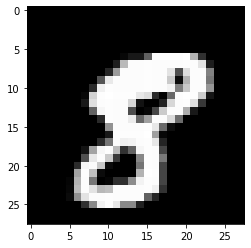

8.0


In [23]:
drawImg(x_train[10])
print(y_train[10])

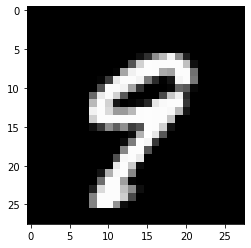

9.0


In [24]:
drawImg(x_train[11])
print(y_train[11])

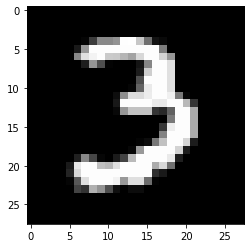

3.0


In [25]:
drawImg(x_train[9])
print(y_train[9])

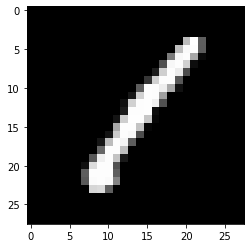

1.0


In [26]:
drawImg(x_train[0])
print(y_train[0])

In [27]:
pred=knn(x_train,y_train,x_test[0])
print(pred)

(array([6.]), array([5]))
6.0


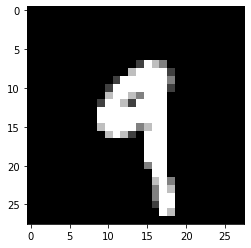

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [28]:
drawImg(x_test[78])
print(x_test[78])

In [29]:
y[3601]

3.0

In [30]:
x_train, x_test = x[0:6000], x[6000:7000]

In [31]:
y_train, y_test = y[0:6000], y[6000:7000]

In [32]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [33]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [40]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28, 28)

In [34]:
y_train

array([8, 0, 6, ..., 7, 4, 9], dtype=int8)

#Making Classification using Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression(tol = 0.1, solver='lbfgs')

In [ ]:
clf.fit(x_train, y_train_2)

In [41]:
clf.predict([some_digit])

array([False])

In [42]:
from sklearn.model_selection import cross_val_score

In [ ]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

In [44]:
a.mean()

0.9591666666666666